In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../data/fitts_law_data.csv")

df.head()

,Trial,Distance_D,Width_W,ID_Bits,MT_ms,Errors
0,1,381.19,200.0,1.9305,423.4,0
1,2,535.99,50.0,4.4222,588.7,0
2,3,203.09,50.0,3.0221,611.6,0
3,4,199.12,25.0,3.9937,688.5,0
4,5,201.36,100.0,2.0098,437.1,0


# Fitt's Law: Movement Time vs Index of Difficulty

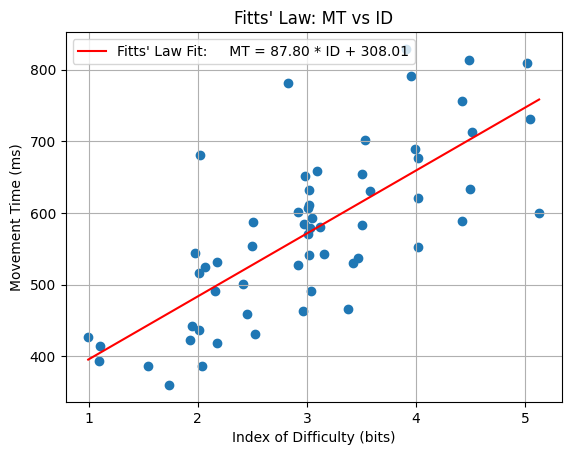

In [8]:
slope, intercept = np.polyfit(df["ID_Bits"], df["MT_ms"], 1)
x_line = np.array([df["ID_Bits"].min(), df["ID_Bits"].max()])
y_line = slope * x_line + intercept

fitts_law = plt.scatter(x=df["ID_Bits"], y=df["MT_ms"])
plt.plot(x_line, y_line, color="red", label=f"Fitts' Law Fit: \
    MT = {slope:.2f} * ID + {intercept:.2f}")

plt.legend(loc="upper left")
plt.xlabel("Index of Difficulty (bits)")
plt.ylabel("Movement Time (ms)")
plt.title("Fitts' Law: MT vs ID")
plt.grid()
plt.savefig("fitts_law_plot.png")
plt.show()

# Button Size vs Movement Time

C:\Users\codyv\AppData\Local\Temp\ipykernel_37212\3277884258.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=widths, patch_artist=True,
C:\Users\codyv\AppData\Local\Temp\ipykernel_37212\3277884258.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


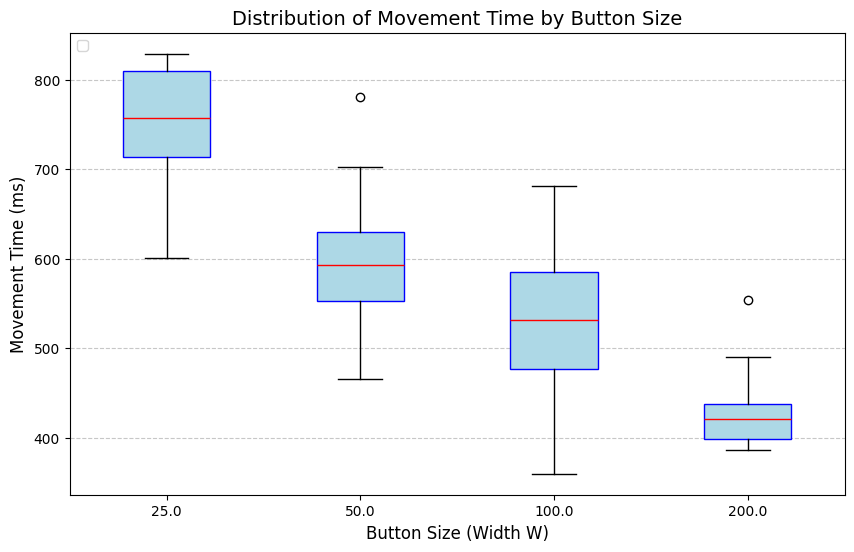

In [ ]:
widths = sorted(df['Width_W'].unique())
data_to_plot = [df[df['Width_W'] == w]['MT_ms'] for w in widths]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=widths, patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))

plt.title("Distribution of Movement Time by Button Size", fontsize=14)
plt.xlabel("Button Size (Width W)", fontsize=12)
plt.ylabel("Movement Time (ms)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("fitts_law_size_boxplot.png")
plt.show()

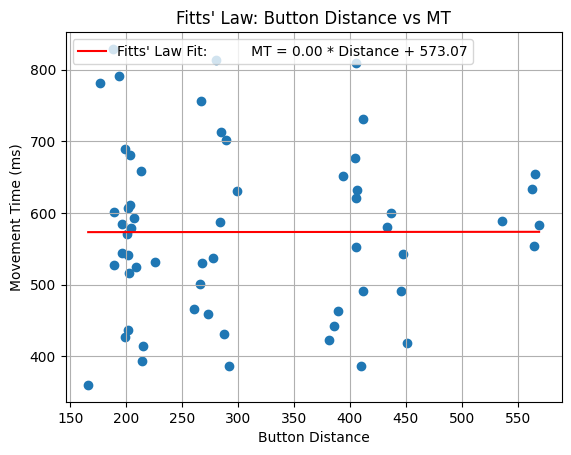

In [10]:
slope, intercept = np.polyfit(df["Distance_D"], df["MT_ms"], 1)
x_line = np.array([df["Distance_D"].min(), df["Distance_D"].max()])
y_line = slope * x_line + intercept

fitts_law_distance = plt.scatter(x=df["Distance_D"], y=df["MT_ms"])
plt.plot(x_line, y_line, color="red", label=f"Fitts' Law Fit: \
         MT = {slope:.2f} * Distance + {intercept:.2f}")

plt.legend(loc="upper left")
plt.xlabel("Button Distance")
plt.ylabel("Movement Time (ms)")
plt.title("Fitts' Law: Button Distance vs MT")
plt.grid()
plt.savefig("fitts_law_distance_vs_MT.png")
plt.show()


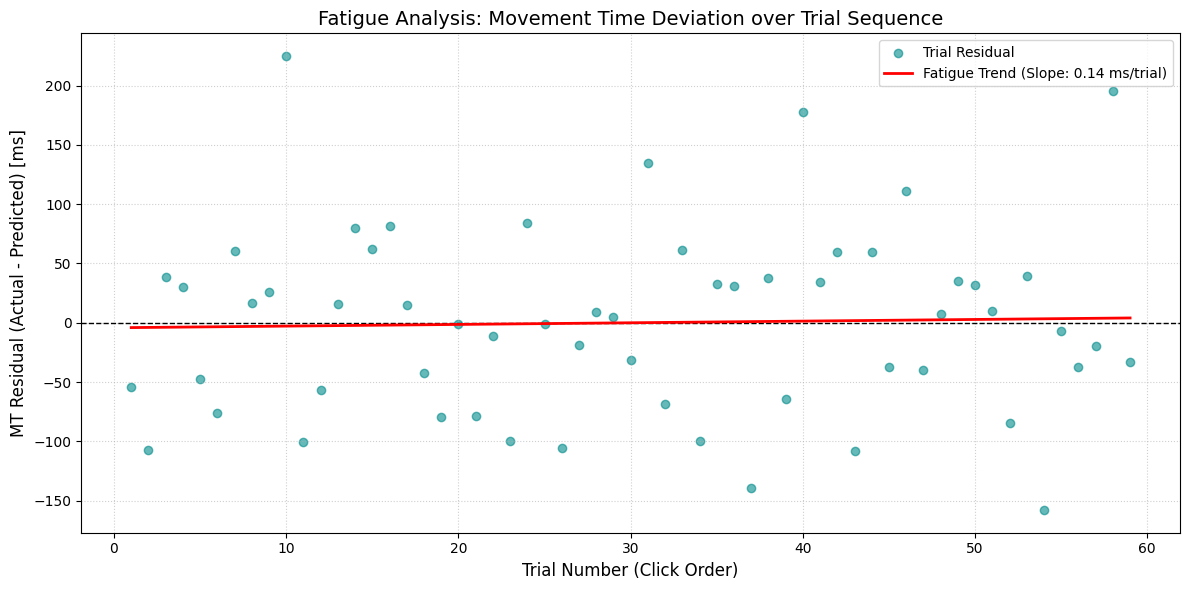

In [11]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['ID_Bits'], df['MT_ms'])

df['Predicted_MT'] = intercept + slope * df['ID_Bits']
df['Residuals'] = df['MT_ms'] - df['Predicted_MT']

plt.figure(figsize=(12, 6))

plt.scatter(df['Trial'], df['Residuals'], alpha=0.6, color='darkcyan', label='Trial Residual')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

z = np.polyfit(df['Trial'], df['Residuals'], 1)
p = np.poly1d(z)
plt.plot(df['Trial'], p(df['Trial']), "r-", linewidth=2, label=f"Fatigue Trend (Slope: {z[0]:.2f} ms/trial)")

plt.legend(loc="upper left")
plt.title('Fatigue Analysis: Movement Time Deviation over Trial Sequence', fontsize=14)
plt.xlabel('Trial Number (Click Order)', fontsize=12)
plt.ylabel('MT Residual (Actual - Predicted) [ms]', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.savefig("fitts_law_fatigue_analysis.png")
plt.show()